<h1>Cleaning Data : Casting DataTypes and Handling Missing Values</h1>

In [1]:
import pandas as pd
import numpy as np

In [2]:
people = {
    'first': ['Corey', 'Jane', 'John', 'Chris', np.nan, None, 'NA'], 
    'last': ['Schafer', 'Doe', 'Doe', 'Schafer', np.nan, np.nan, 'Missing'], 
    'email': ['CoreyMSchafer@gmail.com', 'JaneDoe@email.com', 'JohnDoe@email.com', None, np.nan, 'Anonymous@email.com', 'NA'],
    'age': ['33', '55', '63', '36', None, None, 'Missing']
}

In [3]:
df = pd.DataFrame(people)

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


In [4]:
df.dropna()

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
6,NA,Missing,NA,Missing


In [5]:
df.dropna(axis='index', how='any') #default argument drop the index that have NaN value

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
6,NA,Missing,NA,Missing


In [6]:
df.dropna(axis='index', how='all') # drop the index that have all missing value

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


In [7]:
df.dropna(axis='columns', how='any')

""
0
1
2
3
4
5
6


In [8]:
df

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


In [9]:
df.dropna(axis='index', how='any', subset=['email'])

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


In [10]:
df.dropna(axis='index', how='all', subset=['email','last'])

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


In [11]:
df

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


In [12]:
df.replace('NA', np.nan, inplace=True)
df.replace('Missing', np.nan, inplace=True)

In [13]:
df

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@email.com,None
6,NaN,NaN,NaN,NaN


In [14]:
df.dropna()

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63


In [15]:
df.isna()

,first,last,email,age
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,True,False
4,True,True,True,True
5,True,True,False,True
6,True,True,True,True


In [16]:
df.fillna('MISSING')

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,MISSING,36
4,MISSING,MISSING,MISSING,MISSING
5,MISSING,MISSING,Anonymous@email.com,MISSING
6,MISSING,MISSING,MISSING,MISSING


In [17]:
df.fillna(0)

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,0,36
4,0,0,0,0
5,0,0,Anonymous@email.com,0
6,0,0,0,0


In [18]:
df.dtypes

first    object
last     object
email    object
age      object
dtype: object

In [19]:
df['age'].mean()  # gives error bcoz age is string

TypeError: can only concatenate str (not "int") to str

In [20]:
type(np.nan)

float

In [21]:
dfd['age'] = df['age'].astype(int)  #gives error bcoz there are some nan values 

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [22]:
df['age'] = df['age'].astype(float)

In [23]:
df['age'].mean()

46.75

In [24]:
df.dtypes

first     object
last      object
email     object
age      float64
dtype: object

In [25]:
na_vals = ['NA', 'Missing']
df = pd.read_csv('data/survey_results_public.csv', index_col='Respondent', na_values=na_vals)
schema_df = pd.read_csv('data/survey_results_schema.csv', index_col='Column')

In [26]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [27]:
df.head()

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Int

In [28]:
df['YearsCode'].head(10)

Respondent
1       4
2     NaN
3       3
4       3
5      16
6      13
7       6
8       8
9      12
10     12
Name: YearsCode, dtype: object

In [29]:
df['YearsCode'] = df['YearsCode'].astype(float) #can't convert string to float

ValueError: could not convert string to float: 'Less than 1 year'

In [30]:
df['YearsCode'].unique()

array(['4', nan, '3', '16', '13', '6', '8', '12', '2', '5', '17', '10',
       '14', '35', '7', 'Less than 1 year', '30', '9', '26', '40', '19',
       '15', '20', '28', '25', '1', '22', '11', '33', '50', '41', '18',
       '34', '24', '23', '42', '27', '21', '36', '32', '39', '38', '31',
       '37', 'More than 50 years', '29', '44', '45', '48', '46', '43',
       '47', '49'], dtype=object)

In [31]:
df['YearsCode'].replace('Less than 1 year', 0, inplace=True)
df['YearsCode'].replace('More than 50 years', 51, inplace = True)

In [32]:
df['YearsCode'] = df['YearsCode'].astype(float)

In [33]:
df['YearsCode'].mean()

11.662114216834588

In [34]:
df['YearsCode'].median()

9.0

<h1>Working with Date and Time Series Data :</h1>

In [35]:
df = pd.read_csv('data/ETH_1h.csv')

In [36]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [37]:
df.shape

(23674, 7)

In [38]:
df.loc[0,'Date']

'2020-03-13 08-PM'

In [39]:
 df.loc[0, 'Date'].day_name()

AttributeError: 'str' object has no attribute 'day_name'

In [40]:
df['Date'] = pd.to_datetime(df['Date'])

/var/folders/n1/5mqjbs_d7r53q3v_5z5rv2680000gn/T/ipykernel_4142/2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


DateParseError: Unknown datetime string format, unable to parse: 2020-03-13 08-PM, at position 0

In [41]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %I-%p')

In [42]:
df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [43]:
df.loc[0, 'Date'].day_name()

'Friday'

In [44]:
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')
df = pd.read_csv('data/ETH_1h.csv', parse_dates=['Date'], date_parser=d_parser)

/var/folders/n1/5mqjbs_d7r53q3v_5z5rv2680000gn/T/ipykernel_4142/4101808178.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('data/ETH_1h.csv', parse_dates=['Date'], date_parser=d_parser)


AttributeError: module 'pandas' has no attribute 'datetime'

In [45]:
from datetime import datetime

d_parser = lambda x: datetime.strptime(x, '%Y-%m-%d %I-%p')
df = pd.read_csv('data/ETH_1h.csv', parse_dates=['Date'], date_parser=d_parser)

/var/folders/n1/5mqjbs_d7r53q3v_5z5rv2680000gn/T/ipykernel_4142/2428432190.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('data/ETH_1h.csv', parse_dates=['Date'], date_parser=d_parser)


In [46]:
df = pd.read_csv('data/ETH_1h.csv', parse_dates=['Date'], date_format='%Y-%m-%d %I-%p')

In [47]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [48]:
df['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [49]:
df['DayOfWeek'] = df['Date'].dt.day_name()

In [50]:
df

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


In [51]:
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [52]:
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [53]:
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

In [54]:
filt = (df['Date'] >= '2020')
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
1744,2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
1745,2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
1746,2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday
1747,2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday


In [55]:
filt = (df['Date']>='2019') & (df['Date']<'2020')
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [56]:
filt = (df['Date'] >= pd.to_datetime('2019-01-01')) & (df['Date'] < pd.to_datetime('2020-01-01'))
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [57]:
df.reset_index(inplace=True)

In [58]:
df.set_index('Date', inplace=True)
df

,index,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,,
2020-03-13 20:00:00,0,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,1,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,2,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,3,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,4,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
2017-07-01 15:00:00,23669,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,23670,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,23671,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [59]:
df.loc['2019']

,index,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,,
2019-12-31 23:00:00,1749,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,1750,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,1751,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,1752,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,1753,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
2019-01-01 04:00:00,10504,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,10505,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,10506,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [60]:
df['2020-01':'2020-02']

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

In [61]:
df = df.sort_index()

In [62]:
df['2020-01':'2020-02']

,index,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,,
2020-01-01 00:00:00,1748,ETHUSD,128.54,128.54,128.12,128.34,245119.91,Wednesday
2020-01-01 01:00:00,1747,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday
2020-01-01 02:00:00,1746,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday
2020-01-01 03:00:00,1745,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 04:00:00,1744,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
...,...,...,...,...,...,...,...,...
2020-02-29 19:00:00,313,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
2020-02-29 20:00:00,312,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 21:00:00,311,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday


In [63]:
df['2020-01':'2020-02']['Close']

Date
2020-01-01 00:00:00    128.34
2020-01-01 01:00:00    130.14
2020-01-01 02:00:00    130.37
2020-01-01 03:00:00    129.57
2020-01-01 04:00:00    129.56
                        ...  
2020-02-29 19:00:00    225.31
2020-02-29 20:00:00    224.63
2020-02-29 21:00:00    223.48
2020-02-29 22:00:00    223.35
2020-02-29 23:00:00    217.31
Name: Close, Length: 1440, dtype: float64

In [64]:
df['2020-01':'2020-02']['Close'].mean()

195.1655902777778

In [65]:
df['2020-01':'2020-02'].head(24)

,index,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,,
2020-01-01 00:00:00,1748,ETHUSD,128.54,128.54,128.12,128.34,245119.91,Wednesday
2020-01-01 01:00:00,1747,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday
2020-01-01 02:00:00,1746,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday
2020-01-01 03:00:00,1745,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 04:00:00,1744,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 05:00:00,1743,ETHUSD,129.56,129.94,129.47,129.83,232163.70,Wednesday
2020-01-01 06:00:00,1742,ETHUSD,129.83,130.25,129.82,130.00,118328.64,Wednesday
2020-01-01 07:00:00,1741,ETHUSD,130.00,130.25,129.80,129.87,112620.14,Wednesday
2020-01-01 08:00:00,1740,ETHUSD,129.87,130.01,129.61,130.01,134231.17,Wednesday


In [66]:
df.loc['2020-01-01']['High']

Date
2020-01-01 00:00:00    128.54
2020-01-01 01:00:00    130.14
2020-01-01 02:00:00    130.50
2020-01-01 03:00:00    130.44
2020-01-01 04:00:00    130.00
2020-01-01 05:00:00    129.94
2020-01-01 06:00:00    130.25
2020-01-01 07:00:00    130.25
2020-01-01 08:00:00    130.01
2020-01-01 09:00:00    130.22
2020-01-01 10:00:00    130.33
2020-01-01 11:00:00    131.42
2020-01-01 12:00:00    131.31
2020-01-01 13:00:00    132.08
2020-01-01 14:00:00    132.05
2020-01-01 15:00:00    132.15
2020-01-01 16:00:00    132.56
2020-01-01 17:00:00    132.68
2020-01-01 18:00:00    132.14
2020-01-01 19:00:00    131.72
2020-01-01 20:00:00    131.87
2020-01-01 21:00:00    131.99
2020-01-01 22:00:00    131.41
2020-01-01 23:00:00    130.27
Name: High, dtype: float64

In [67]:
df.loc['2020-01-01']['High'].max()

132.68

In [68]:
df['High'].resample('D').max() #resampling by day
# gives maxm value for each of these day

Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
               ...  
2020-03-09    208.65
2020-03-10    206.28
2020-03-11    202.98
2020-03-12    195.64
2020-03-13    148.00
Freq: D, Name: High, Length: 987, dtype: float64

In [69]:
highs = df['High'].resample('D').max()
highs['2020-01-01']

132.68

In [70]:
%matplotlib inline 

<Axes: xlabel='Date'>

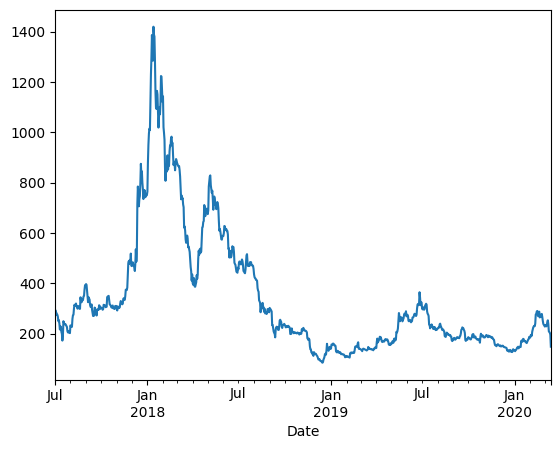

In [71]:
highs.plot()

In [72]:
df.resample('W')

In [73]:
df.resample('W').agg({'Close':'mean', 'High':'max', 'Low':'min', 'Volume':'sum'})
#resampling by week
#resampling multiple column

,Close,High,Low,Volume
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.309524,229.99,178.03,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.321905,287.13,242.36,3.067838e+08
2020-03-01,236.373988,278.13,209.26,3.693920e+08


<h1> Reading/Writing Data to Different Sources - Excel, JSON, SQL, Etc</h1>

In [74]:
df = pd.read_csv('data/survey_results_public.csv', index_col='Respondent')
schema_df = pd.read_csv('data/survey_results_schema.csv', index_col='Column')

In [75]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [76]:
df.head()

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Int

In [77]:
filt = (df['Country']=='India')
india_df = df.loc[filt]
india_df.head()

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,I code primarily as a hobby,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...",NaN,"Developer, back-end;Engineer, site reliability",8,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,Bash/Shell/PowerShell;C;C++;Elixir;Erlang;Go;P...,Cassandra;Elasticsearch;MongoDB;MySQL;Oracle;R...,Cassandra;DynamoDB;Elasticsearch;Firebase;Mong...,AWS;Docker;Heroku;Linux;MacOS;Slack,Android;Arduino;AWS;Docker;Google Cloud Platfo...,Express;Flask;React.js;Spring,Django;Express;Flask;React.js;Vue.js,Hadoop;Node.js;Pandas,Ansible;Apache Spark;Chef;Hadoop;Node.js;Panda...,Atom;IntelliJ;IPython / Jupyter;PyCharm;Visual...,Linux-based,Development;Testing;Production;Outside of work...,NaN,Useful across many domains and could change ma...,Yes,SIGH,Yes,YouTube,In real life (in person),Handle,2012,A few times per week,Find answers to specific questions;Learn how t...,Less than once per week,Stack Overflow was slightly faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","Yes, definitely",A lot more welcome now than last year,Tech articles written by other developers;Indu...,24.0,Man,No,Straight / Heterosexual,NaN,NaN,Appropriate in length,Neither easy nor difficult
10,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,NaN,"10,000 or more employees",Data or business analyst;Data scientist or mac...,12,20,10,Slightly dissatisfied,Slightly dissatisfied,Somewhat confident,Yes,Yes,"I’m not actively looking, but I am open to new...",3-4 years ago,NaN,No,"Languages, frameworks, and other technologies ...",NaN,INR,Indian rupee,950000.0,Yearly,13293.0,70.0,There's no schedule or spec; I work on what se...,NaN,A few days each month,Home,Far above average,"Yes, because I see value in code review",4.0,"Yes, it's part of our process",NaN,NaN,C#;Go;JavaScript;Python;R;SQL,C#;Go;JavaScript;Kotlin;Python;R;SQL,Elasticsearch;MongoDB;Microsoft SQL Server;MyS...,Elasticsearch;MongoDB;Microsoft SQL Server,Linux;Windows,Android;Linux;Raspberry Pi;Windows,Angular/Angular.js;ASP.NET;Django;Express;Flas...,Angular/Angular.js;ASP.NET;Django;Express;Flas...,.NET;Node.js;Pandas;Torch/PyTorch,.NET;Node.js;TensorFlow;Torch/PyTorch,Android Studio;Eclipse;IPython / Jupyter;Notep...,Windows,NaN,Not at all,Useful for immutable record keeping outside of...,No,Yes,Yes,YouTube,Neither,Screen Name,NaN,Multiple times per day,Find answers to specific questions;Get a sense...,3-5 times per week,They were about the same,N

In [78]:
india_df.to_csv('data/modified.csv') 

In [84]:
india_df.to_csv('data/modified.tsv', sep='\t') #tab delimited file

In [85]:
india_df.to_excel('data/modified.xlsx')

In [87]:
test = pd.read_excel('data/modified.xlsx',index_col='Respondent')
test

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,I code primarily as a hobby,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...",NaN,"Developer, back-end;Engineer, site reliability",8,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,Bash/Shell/PowerShell;C;C++;Elixir;Erlang;Go;P...,Cassandra;Elasticsearch;MongoDB;MySQL;Oracle;R...,Cassandra;DynamoDB;Elasticsearch;Firebase;Mong...,AWS;Docker;Heroku;Linux;MacOS;Slack,Android;Arduino;AWS;Docker;Google Cloud Platfo...,Express;Flask;React.js;Spring,Django;Express;Flask;React.js;Vue.js,Hadoop;Node.js;Pandas,Ansible;Apache Spark;Chef;Hadoop;Node.js;Panda...,Atom;IntelliJ;IPython / Jupyter;PyCharm;Visual...,Linux-based,Development;Testing;Production;Outside of work...,NaN,Useful across many domains and could change ma...,Yes,SIGH,Yes,YouTube,In real life (in person),Handle,2012,A few times per week,Find answers to specific questions;Learn how t...,Less than once per week,Stack Overflow was slightly faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","Yes, definitely",A lot more welcome now than last year,Tech articles written by other developers;Indu...,24.0,Man,No,Straight / Heterosexual,NaN,NaN,Appropriate in length,Neither easy nor difficult
10,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,NaN,"10,000 or more employees",Data or business analyst;Data scientist or mac...,12,20,10,Slightly dissatisfied,Slightly dissatisfied,Somewhat confident,Yes,Yes,"I’m not actively looking, but I am open to new...",3-4 years ago,NaN,No,"Languages, frameworks, and other technologies ...",NaN,INR,Indian rupee,950000.0,Yearly,13293.0,70.0,There's no schedule or spec; I work on what se...,NaN,A few days each month,Home,Far above average,"Yes, because I see value in code review",4.0,"Yes, it's part of our process",NaN,NaN,C#;Go;JavaScript;Python;R;SQL,C#;Go;JavaScript;Kotlin;Python;R;SQL,Elasticsearch;MongoDB;Microsoft SQL Server;MyS...,Elasticsearch;MongoDB;Microsoft SQL Server,Linux;Windows,Android;Linux;Raspberry Pi;Windows,Angular/Angular.js;ASP.NET;Django;Express;Flas...,Angular/Angular.js;ASP.NET;Django;Express;Flas...,.NET;Node.js;Pandas;Torch/PyTorch,.NET;Node.js;TensorFlow;Torch/PyTorch,Android Studio;Eclipse;IPython / Jupyter;Notep...,Windows,NaN,Not at all,Useful for immutable record keeping outside of...,No,Yes,Yes,YouTube,Neither,Screen Name,NaN,Multiple times per day,Find answers to specific questions;Get a sense...,3-5 times per week,They were about the same,N

In [88]:
india_df.to_json('data/modified.json')

In [89]:
india_df.to_json('data/modified.json', orient='records', lines=True)

In [90]:
test = pd.read_json('data/modified.json',orient='records', lines=True)

In [91]:
test.head()

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,I code primarily as a hobby,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,None,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...",None,"Developer, back-end;Engineer, site reliability",8,16,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,None,None,None,None,None,None,NaN,None,None,None,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,Bash/Shell/PowerShell;C;C++;Elixir;Erlang;Go;P...,Cassandra;Elasticsearch;MongoDB;MySQL;Oracle;R...,Cassandra;DynamoDB;Elasticsearch;Firebase;Mong...,AWS;Docker;Heroku;Linux;MacOS;Slack,Android;Arduino;AWS;Docker;Google Cloud Platfo...,Express;Flask;React.js;Spring,Django;Express;Flask;React.js;Vue.js,Hadoop;Node.js;Pandas,Ansible;Apache Spark;Chef;Hadoop;Node.js;Panda...,Atom;IntelliJ;IPython / Jupyter;PyCharm;Visual...,Linux-based,Development;Testing;Production;Outside of work...,None,Useful across many domains and could change ma...,Yes,SIGH,Yes,YouTube,In real life (in person),Handle,2012,A few times per week,Find answers to specific questions;Learn how t...,Less than once per week,Stack Overflow was slightly faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","Yes, definitely",A lot more welcome now than last year,Tech articles written by other developers;Indu...,24.0,Man,No,Straight / Heterosexual,None,None,Appropriate in length,Neither easy nor difficult
1,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",None,None,"10,000 or more employees",Data or business analyst;Data scientist or mac...,12,20,10,Slightly dissatisfied,Slightly dissatisfied,Somewhat confident,Yes,Yes,"I’m not actively looking, but I am open to new...",3-4 years ago,None,No,"Languages, frameworks, and other technologies ...",None,INR,Indian rupee,950000.0,Yearly,13293.0,70.0,There's no schedule or spec; I work on what se...,None,A few days each month,Home,Far above average,"Yes, because I see value in code review",4.0,"Yes, it's part of our process",None,None,C#;Go;JavaScript;Python;R;SQL,C#;Go;JavaScript;Kotlin;Python;R;SQL,Elasticsearch;MongoDB;Microsoft SQL Server;MyS...,Elasticsearch;MongoDB;Microsoft SQL Server,Linux;Windows,Android;Linux;Raspberry Pi;Windows,Angular/Angular.js;ASP.NET;Django;Express;Flas...,Angular/Angular.js;ASP.NET;Django;Express;Flas...,.NET;Node.js;Pandas;Torch/PyTorch,.NET;Node.js;TensorFlow;Torch/PyTorch,Android Studio;Eclipse;IPython / Jupyter;Notep...,Windows,None,Not at all,Useful for immutable record keeping outside of...,No,Yes,Yes,YouTube,Neither,Screen Name,None,Multiple times per day,Find answers to specific questions;Get a sense...,3-5 times per week,They were about the same,None,Yes,A few times per month or weekly,Yes,"No, and I don